# Recreated: Structured and Time Series Data

## The Usual Imports and Setup

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
from IPython.display import HTML

PATH = '/home/paperspace/data/rossmann/'

### Load in the Feature Set

csv files:
 * train: train set provided by competition
 * store: list of stores
 * store_states: mapping of the stores to the German state they are in
 * state_names: List of German state names
 * googletrend: trend of certain google keywords over time, found by users to correlate well w/ given data
 * weather: German weather
 * test: test set

In [3]:
table_names = ['train', 'store', 'store_states', 'state_names', 'googletrend', 'weather', 'test']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [4]:
for t,v in zip(tables,table_names):
    print(v)
    display(t.head())

train


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


store


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


store_states


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


state_names


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


googletrend


,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


weather


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


test


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


table contents:
 * train: tracks store sales, customers, whether the day was a holiday, etc on daily basis
 * store: general info on store including competition
 * store_states: maps store to German state (abbrevition)
 * store_names: maps German state abbreviations to full names
 * googletrend: trend data for particular week/state
 * weather: weather conditions for each state
 * test: test set (same as train w/o sales & customers)

In [5]:
# Summmarized aggregate info for each table field
for t,v in zip(tables,table_names):
    print(v)
    display(DataFrameSummary(t).summary())

train


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06,NaN,1.01721e+06
mean,558.43,3.99834,NaN,5773.82,633.146,0.830107,0.381515,NaN,0.178647
std,321.909,1.99739,NaN,3849.93,464.412,0.375539,0.485759,NaN,0.383056
min,1,1,NaN,0,0,0,0,NaN,0
25%,280,2,NaN,3727,405,1,0,NaN,0
50%,558,4,NaN,5744,609,1,0,NaN,0
75%,838,6,NaN,7856,837,1,1,NaN,0
max,1115,7,NaN,41551,7388,1,1,NaN,1
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2


store


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115,NaN,NaN,1112,761,761,1115,571,571,NaN
mean,558,NaN,NaN,5404.9,7.2247,2008.67,0.512108,23.5954,2011.76,NaN
std,322.017,NaN,NaN,7663.17,3.21235,6.19598,0.500078,14.142,1.67494,NaN
min,1,NaN,NaN,20,1,1900,0,1,2009,NaN
25%,279.5,NaN,NaN,717.5,4,2006,0,13,2011,NaN
50%,558,NaN,NaN,2325,8,2010,1,22,2012,NaN
75%,836.5,NaN,NaN,6882.5,10,2013,1,37,2013,NaN
max,1115,NaN,NaN,75860,12,2015,1,50,2015,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


store_states


,Store,State
count,1115,NaN
mean,558,NaN
std,322.017,NaN
min,1,NaN
25%,279.5,NaN
50%,558,NaN
75%,836.5,NaN
max,1115,NaN
counts,1115,1115
uniques,1115,12


state_names


,StateName,State
count,16,16
unique,16,16
top,RheinlandPfalz,BB
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


googletrend


,file,week,trend
count,NaN,NaN,2072
mean,NaN,NaN,63.8142
std,NaN,NaN,12.6502
min,NaN,NaN,0
25%,NaN,NaN,55
50%,NaN,NaN,64
75%,NaN,NaN,72
max,NaN,NaN,100
counts,2072,2072,2072
uniques,14,148,68


weather


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,NaN,NaN,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,NaN,15840
mean,NaN,NaN,14.6441,10.389,6.19899,8.58782,6.20581,3.62614,93.6596,74.2829,...,24.0576,12.2398,7.02516,22.7666,11.9722,48.8643,0.831718,5.55131,NaN,175.897
std,NaN,NaN,8.64601,7.37926,6.52639,6.24478,6.08677,6.12839,7.67853,13.4866,...,8.9768,5.06794,4.9806,8.98862,5.87284,13.027,2.51351,1.68771,NaN,101.589
min,NaN,NaN,-11,-13,-15,-14,-15,-73,44,30,...,0,0,0,3,2,21,0,0,NaN,-1
25%,NaN,NaN,8,4,1,4,2,-1,90.75,65,...,14,10,3,16,8,39,0,5,NaN,80
50%,NaN,NaN,15,11,7,9,7,4,94,76,...,31,11,7,21,11,48,0,6,NaN,202
75%,NaN,NaN,21,16,11,13,11,8,100,85,...,31,14,10,27,14,55,0.25,7,NaN,256
max,NaN,NaN,39,31,24,25,20,19,100,100,...,31,31,31,101,53,111,58.93,8,NaN,360
counts,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,11889,15840
uniques,16,990,51,45,40,40,36,40,53,71,...,24,32,24,44,29,47,41,9,21,362


test


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
count,41088,41088,41088,NaN,41077,41088,NaN,41088
mean,20544.5,555.9,3.97917,NaN,0.854322,0.395833,NaN,0.443487
std,11861.2,320.274,2.01548,NaN,0.352787,0.489035,NaN,0.496802
min,1,1,1,NaN,0,0,NaN,0
25%,10272.8,279.75,2,NaN,1,0,NaN,0
50%,20544.5,553.5,4,NaN,1,0,NaN,0
75%,30816.2,832.25,6,NaN,1,1,NaN,1
max,41088,1115,7,NaN,1,1,NaN,1
counts,41088,41088,41088,41088,41077,41088,41088,41088
uniques,41088,856,7,48,2,2,2,2


### Feature Engineering

In [6]:
train, store, store_states, store_names, googletrend, weather, test = tables

In [7]:
train.StateHoliday = train.StateHoliday != '0'
test.StateHoliday = test.StateHoliday != '0'

In [8]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on == None:
        right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, suffixes=('', suffix))

In [9]:
# See how many of the StateName and file are shared
np.intersect1d(store_names.StateName.unique(), weather.file.unique())
# 16 out of 16...

array(['BadenWuerttemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen', 'Hamburg', 'Hessen',
       'MecklenburgVorpommern', 'Niedersachsen', 'NordrheinWestfalen', 'RheinlandPfalz', 'Saarland',
       'Sachsen', 'SachsenAnhalt', 'SchleswigHolstein', 'Thueringen'], dtype=object)

In [10]:
# Join weather and store_names into weather
weather = join_df(weather, store_names, 'file', 'StateName')

In [11]:
# Extract dates and state names from data into new googletrend columns
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]

In [12]:
store_states.State.unique()

array(['HE', 'TH', 'NW', 'BE', 'SN', 'SH', 'HB,NI', 'BY', 'BW', 'RP', 'ST', 'HH'], dtype=object)

In [13]:
tmp = googletrend.file.str.split('_', expand=True)[2]

In [14]:
tmp.unique()

array(['SN', None, 'BY', 'TH', 'NW', 'BE', 'RP', 'BW', 'NI', 'SH', 'HE', 'ST', 'HH', 'SL'], dtype=object)

In [15]:
# change 'NI' to 'HB,NI' to match other tables
googletrend.loc[googletrend.State=='NI', 'State'] = 'HB,NI'

In [16]:
# convert '2010-03-12' column into 'day', 'year', 'month', 'islastdayofmonth', etc columns
add_datepart(weather, 'Date', drop=False)
add_datepart(googletrend, 'Date', drop=False)
add_datepart(train, 'Date', drop=False)
add_datepart(test, 'Date', drop=False)

In [17]:
# googletrend table has a special cat for all of Germany ... pull that out for explicit use
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

In [18]:
store = join_df(store, store_states, 'Store')
len(store[store.Store.isnull()])

0

In [19]:
joined = join_df(train, store, 'Store')
joined_test = join_df(test, store, 'Store')
len(joined[joined.StoreType.isnull()]), len(joined_test[joined_test.StoreType.isnull()])

(0, 0)

In [20]:
joined = join_df(joined, googletrend, ["State","Year", "Week"])
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])
len(joined[joined.trend.isnull()]),len(joined_test[joined_test.trend.isnull()])

(0, 0)

In [21]:
joined = joined.merge(trend_de, 'left', ['Year', 'Week'], suffixes=('', '_DE'))
joined_test = joined_test.merge(trend_de, 'left', ['Year', 'Week'], suffixes=('', '_DE'))
len(joined[joined.trend_DE.isnull()]), len(joined_test[joined_test.trend_DE.isnull()])

(0, 0)

In [22]:
joined = join_df(joined, weather, ["State","Date"])
joined_test = join_df(joined_test, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()]),len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

In [23]:
for df in (joined, joined_test):
    for c in df.columns:
        if c.endswith('_y'):
            if c in df.columns: df.drop(c, inplace=True, axis=1)

Fill in NA/NANs (Na = Not Available) with an arbitrary signal value.

In [24]:
for df in (joined,joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

Extract more features such as 'CompetitionOpenSince', 'CompetitionDaysOpen', 'CompetitionMonthsOpen', 'Promo2Since', 'Promo2Days', 'Promo2Months'

In [25]:
for df in (joined,joined_test):
    df["CompetitionOpenSince"] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                     month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

In [26]:
# replace some outlying/erroneous data
for df in (joined,joined_test):
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

In [27]:
for df in (joined,joined_test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined.CompetitionMonthsOpen.unique()

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,  1, 14, 20,  8, 18,  6, 21,  5])

In [28]:
for df in (joined,joined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(
        x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1).astype(pd.datetime))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

In [29]:
for df in (joined,joined_test):
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25

In [30]:
joined.to_feather(f'{PATH}recreate_joined')
joined_test.to_feather(f'{PATH}recreate_joined_test')

Add a duration field that counts the time elapsed since the last update for selected fields.

In [31]:
def get_elapsed(df, field, prefix):
    """
    Note: this function assumes df is sorted by store and date
    Args:
      df (DateFrame): DataFrame to operate on
      field (String): the field to count the duration since last value
      prefix (String): prefix to add to the new coulmn field created
    Return:
      None
    """
    day1 = np.timedelta64(1, 'D')
    last_date = np.timedelta64()
    last_store = 0
    deltas = []
    
    for s,v,d in zip(df.Store.values, df[field].values, df.Date.values):
        if s != last_store:
            last_store = s
            last_date = np.timedelta64()
        if v:
            last_date = d
        deltas.append((d-last_date).astype('timedelta64[D]') / day1)
    df[prefix+field] = deltas

In [32]:
# Columns to sort or get durations of
columns = ['Date', 'Store', 'Promo', 'StateHoliday', 'SchoolHoliday']

df_train = train[columns]
df_test = test[columns]

In [33]:
field = 'SchoolHoliday'
df_train = df_train.sort_values(['Store', 'Date'])
df_test = df_test.sort_values(['Store', 'Date'])
get_elapsed(df_train, field, 'After') # Get duration since a school holiday
get_elapsed(df_test, field, 'After')
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(df_train, field, 'Before') # Get duration until a school holiday
get_elapsed(df_test, field, 'Before')

In [34]:
field = 'StateHoliday'
df_train = df_train.sort_values(['Store', 'Date'])
df_test = df_test.sort_values(['Store', 'Date'])
get_elapsed(df_train, field, 'After') # Get duration since a school holiday
get_elapsed(df_test, field, 'After')
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(df_train, field, 'Before') # Get duration until a school holiday
get_elapsed(df_test, field, 'Before')

In [35]:
field = 'Promo'
df_train = df_train.sort_values(['Store', 'Date'])
df_test = df_test.sort_values(['Store', 'Date'])
get_elapsed(df_train, field, 'After') # Get duration since a school holiday
get_elapsed(df_test, field, 'After')
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(df_train, field, 'Before') # Get duration until a school holiday
get_elapsed(df_test, field, 'Before')

In [36]:
# Fill in any null values with a 0
df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

columns = ['Promo', 'StateHoliday', 'SchoolHoliday']

def replace_nulls(df, cols, prefixes):
    for i in prefixes:
        for j in cols:
            k = i+j
            df[k] = df[k].fillna(0).astype(int)
            
replace_nulls(df_train, columns, ['Before', 'After'])
replace_nulls(df_test, columns, ['Before', 'After'])

In [37]:
# rolling window to count the number of events in the Date column (grouped by Store) (in both directions)
# Note current index is still set to Date

backwards_train = df_train[['Store']+columns].sort_index().groupby("Store").rolling(window=7, min_periods=1).sum()
backwards_test = df_test[['Store']+columns].sort_index().groupby("Store").rolling(window=7, min_periods=1).sum()
forwards_train = df_train[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(window=7, min_periods=1).sum()
forwards_test = df_test[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(window=7, min_periods=1).sum()

In [38]:
backwards_train.drop(labels='Store', axis=1, inplace=True)
backwards_train.reset_index(inplace=True)

backwards_test.drop(labels='Store', axis=1, inplace=True)
backwards_test.reset_index(inplace=True)

forwards_train.drop(labels='Store', axis=1, inplace=True)
forwards_train.reset_index(inplace=True)

forwards_test.drop(labels='Store', axis=1, inplace=True)
forwards_test.reset_index(inplace=True)

In [39]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [40]:
df_train = df_train.merge(backwards_train, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df_test = df_test.merge(backwards_test, 'left', ['Date', 'Store'], suffixes=['', '_bw'])

df_train = df_train.merge(forwards_train, 'left', ['Date', 'Store'], suffixes=['', '_fw'])
df_test = df_test.merge(forwards_test, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [41]:
df_train.drop(columns,1,inplace=True)
df_test.drop(columns,1,inplace=True)

In [42]:
df_train.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,Promo_bw,StateHoliday_bw,SchoolHoliday_bw,Promo_fw,StateHoliday_fw,SchoolHoliday_fw
0,2015-07-31,1,0,0,57,1438300800000000000,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,0,0,56,1438214400000000000,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,0,0,55,1438128000000000000,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,0,0,54,1438041600000000000,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,0,0,53,1437955200000000000,0,0,1.0,0.0,1.0,5.0,0.0,5.0


In [43]:
df_train.to_feather(f'{PATH}recreate_df_train')
df_test.to_feather(f'{PATH}recreate_df_test')

In [44]:
df_train = pd.read_feather(f'{PATH}recreate_df_train')
df_test = pd.read_feather(f'{PATH}recreate_df_test')

In [45]:
df_train["Date"] = pd.to_datetime(df_train.Date)
df_test['Date'] = pd.to_datetime(df_test.Date)

df_train.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'Promo_bw', 'StateHoliday_bw', 'SchoolHoliday_bw', 'Promo_fw',
       'StateHoliday_fw', 'SchoolHoliday_fw'],
      dtype='object')

In [46]:
joined = join_df(joined, df_train, ['Store', 'Date'])
joined_test = join_df(joined_test, df_test, ['Store', 'Date'])

In [47]:
joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)

In [48]:
joined.to_feather(f'{PATH}recreate_joined')
joined_test.to_feather(f'{PATH}recreate_joined_test')

### Create Features

The goal is now to convert this into something input-able to a neural network

In [49]:
joined = pd.read_feather(f'{PATH}recreate_joined')
joined_test = pd.read_feather(f'{PATH}recreate_joined_test')

In [50]:
joined.head().T.head(40)

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [51]:
categorical_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

continguous_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

n = len(joined)
n

1017209

In [52]:
dependent_var = 'Sales'
joined = joined[categorical_vars + continguous_vars + [dependent_var, 'Date']].copy()

In [53]:
joined_test[dependent_var] = 0 # since joined_test doesn't have 'Sales' Colm initialize one to all zeros to mirror joined
joined_test = joined_test[categorical_vars+continguous_vars+[dependent_var, 'Date', 'Id']].copy()

In [54]:
for v in categorical_vars:
    joined[v] = joined[v].astype('category').cat.as_ordered() # set as ordered categorical data
# I don't think ordered is doing much for us here ... just means that min/max type fcns have meaning

In [55]:
apply_cats(joined_test, joined)

In [56]:
for v in continguous_vars:
    joined[v] = joined[v].astype('float32') # float32 is just what pytorch expects for continguous data
    joined_test[v] = joined_test[v].astype('float32')

In [57]:
joined.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales,Date
0,1,5,2015,7,31,False,24,0,c,a,...,11.0,1.0,85.0,83.0,57.0,1.438301e+18,1.0,1.0,5263,2015-07-31
1,2,5,2015,7,31,False,24,25,a,a,...,11.0,4.0,80.0,83.0,67.0,1.438301e+18,1.0,1.0,6064,2015-07-31


In [58]:
joined.dtypes

Store                             category
DayOfWeek                         category
Year                              category
Month                             category
Day                               category
StateHoliday                      category
CompetitionMonthsOpen             category
Promo2Weeks                       category
StoreType                         category
Assortment                        category
PromoInterval                     category
CompetitionOpenSinceYear          category
Promo2SinceYear                   category
State                             category
Week                              category
Events                            category
Promo_fw                          category
Promo_bw                          category
StateHoliday_fw                   category
StateHoliday_bw                   category
SchoolHoliday_fw                  category
SchoolHoliday_bw                  category
CompetitionDistance                float32
Max_Tempera

In [59]:
joined = joined.set_index('Date')
df, y, nas, mapper = proc_df(joined, 'Sales', do_scale=True)
y_log = np.log(y)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
joined_test = joined_test.set_index('Date')
df_test, _, nas, mapper = proc_df(joined_test, 'Sales', do_scale=True, skip_flds=['Id'], mapper=mapper, na_dict=nas)

In [61]:
df.head(2) # now the training data should be prepared

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,CompetitionDistance_na,CloudCover_na
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,3,7,31,1,25,1,3,1,...,-0.147662,-2.812232,1.744363,1.743047,-0.009195,0.0,1.273237,2.144211,-0.05103,-0.292796
2015-07-31,2,5,3,7,31,1,25,26,1,1,...,-0.147662,-0.961640,1.303440,1.743047,-0.009195,0.0,1.273237,2.144211,-0.05103,-0.292796


In [62]:
# We need validation data
# note val data for time series data shouldn't be random since there's an imporant relationship between samples close to
# each other. Rather I'm simply setting aside the same length of data as the test set
val_start_idx = len(df) - len(df_test)
len(df_test)

41088

In [63]:
val_idxs = list(range(val_start_idx, len(df)))

## Configure and Train Model

Root-mean-squared percent error is the metric Kaggle used for this competition

In [64]:
def exponent_root_mean_squared_percent_error(y_pred, target):
    target = np.exp(target)
    percent_var = (target - np.exp(y_pred))/target
    return math.sqrt((percent_var ** 2).mean())

max_log_y = np.max(y_log)
y_range = (0, max_log_y*1.2)

In [65]:
# Create a ModelData object directly from data frame
md = ColumnarModelData.from_data_frame(PATH, val_idxs, df, y_log.astype(np.float32), cat_flds=categorical_vars, bs=128, test_df=df_test)

In [66]:
categorical_var_size = [(c, len(joined[c].cat.categories)+1) for c in categorical_vars]

In [67]:
categorical_var_size

[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 3),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53),
 ('Events', 22),
 ('Promo_fw', 7),
 ('Promo_bw', 7),
 ('StateHoliday_fw', 4),
 ('StateHoliday_bw', 4),
 ('SchoolHoliday_fw', 9),
 ('SchoolHoliday_bw', 9)]

Use the cardinality (# of unique values) of each variable to decide how large to make its embeddings. Each level will be associated with a vector with length defined below.

In [68]:
embedding_sizes = [(sz, min(50, (sz+1)//2)) for _,sz in categorical_var_size]

In [69]:
embedding_sizes

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (3, 2),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27),
 (22, 11),
 (7, 4),
 (7, 4),
 (4, 2),
 (4, 2),
 (9, 5),
 (9, 5)]

In [82]:
learner = md.get_learner(embedding_sizes, len(df.columns)-len(categorical_vars), 0.04, 1, [1000, 500], [0.001,0.01], 
                      y_range=y_range)

In [95]:
learner.summary

<bound method Learner.summary of MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(1116, 50)
    (1): Embedding(8, 4)
    (2): Embedding(4, 2)
    (3): Embedding(13, 7)
    (4): Embedding(32, 16)
    (5): Embedding(3, 2)
    (6): Embedding(26, 13)
    (7): Embedding(27, 14)
    (8): Embedding(5, 3)
    (9): Embedding(4, 2)
    (10): Embedding(4, 2)
    (11): Embedding(24, 12)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 27)
    (15): Embedding(22, 11)
    (16): Embedding(7, 4)
    (17): Embedding(7, 4)
    (18): Embedding(4, 2)
    (19): Embedding(4, 2)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
  )
  (lins): ModuleList(
    (0): Linear(in_features=217, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_

In [71]:
learner.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/7626 [00:04<?, ?it/s, loss=inf]


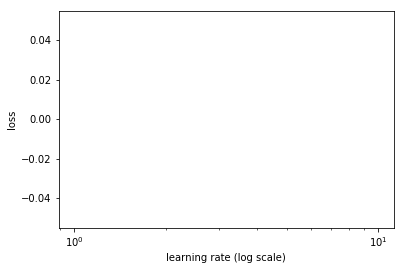

In [72]:
learner.sched.plot(100)